In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [ ]:
data = mnist.load_data()
(x_train,y_train),(x_test, y_test) = data

#Explore Data
**Get an overall understanding of MNIST dataset. Check shape and see sample images of data.**

In [ ]:
#Check shape of image data.
print("x_train.shape =>", x_train.shape)
print("y_train.shape =>", y_train.shape)

x_train.shape => (60000, 28, 28)
y_train.shape => (60000,)


y_train number => 6
x_train image =>


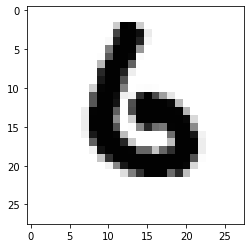

In [ ]:
#See randomly chosen image from training set.
index = random.randint(0,60000)
print("y_train number =>", y_train[index])
print("x_train image =>")
plt.imshow(x_train[index],cmap='Greys')

y_test number => 8
x_test image =>


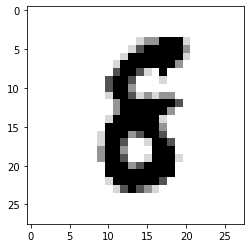

In [ ]:
#See randomly chosen image from test set.
index = random.randint(0,10000)
print("y_test number =>", y_test[index])
print("x_test image =>")
plt.imshow(x_test[index],cmap='Greys')

#Data Preprocessing
**Reshape and normalise data. Converts numerical labels to categorical.**

In [ ]:
#Converts y values into categorical
print("y_train.shape => ", y_train.shape)
print("y_test.shape => ", y_test.shape)

ycat_train = to_categorical(y_train)
ycat_test = to_categorical(y_test)

print("ycat_train.shape => ", ycat_train.shape)
print("ycat_test.shape => ", ycat_test.shape)


y_train.shape =>  (60000,)
y_test.shape =>  (10000,)
ycat_train.shape =>  (60000, 10)
ycat_test.shape =>  (10000, 10)


In [ ]:
#Create image generator to scale and distort image for training.
image_gen = ImageDataGenerator(rotation_range=180, 
                               width_shift_range=0.3,
                               height_shift_range=0.3,
                               shear_range=0.3,
                               rescale=1/255,
                               fill_mode='nearest')

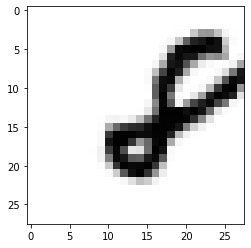

In [ ]:
#View random distorted image
index = random.randint(0,10000)
#Reshape training data to include axis of 1 for greyscale images in order to use image generator.
sample_image = x_train[index].reshape(28,28,1)
distorted_image = image_gen.random_transform(sample_image)
distorted_image = distorted_image.reshape(28,28)
plt.imshow(distorted_image, cmap='Greys')

In [ ]:
#Reshape data for model fitting
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
#Create image generators with the associated data sets for generation of distorted data later on.
train_img_gen = image_gen.flow(x_train,ycat_train)
test_img_gen = image_gen.flow(x_test,ycat_test,shuffle=False)

#Model Training and Fitting
**Create model with the desired layers and parameters. Compile and run model to fit model to the data.**



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Create and compile model with desired configuration
model = Sequential()

model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 input_shape=(28,28,1), 
                 padding='valid',
                 activation='relu', 
                 ))

model.add(MaxPool2D(pool_size=(4,4)))

model.add(Conv2D(filters=32, 
                 kernel_size=(2,2),
                 padding='valid',
                 activation='relu', 
                 ))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Set up early stopping parameter
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
#Fit model to data using the image generator datasets. This inputs the randomly distorted dataset.
model.fit_generator(train_img_gen,
                    epochs=100,
                    callbacks=early_stop,
                    validation_data=test_img_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1875/1875 [==============================] - 42s 22ms/step - loss: 2.0718 - accuracy: 0.2377 - val_loss: 1.8846 - val_accuracy: 0.3220
Epoch 2/100
1875/1875 [==============================] - 41s 22ms/step - loss: 1.8606 - accuracy: 0.3271 - val_loss: 1.7296 - val_accuracy: 0.3836
Epoch 3/100
1875/1875 [==============================] - 41s 22ms/step - loss: 1.7434 - accuracy: 0.3738 - val_loss: 1.5888 - val_accuracy: 0.4329
Epoch 4/100
1875/1875 [==============================] - 41s 22ms/step - loss: 1.6560 - accuracy: 0.4060 - val_loss: 1.5183 - val_accuracy: 0.4587
Epoch 5/100
1875/1875 [==============================] - 40s 22ms/step - loss: 1.6082 - accuracy: 0.4236 - val_loss: 1.4565 - val_accuracy: 0.4819
Epoch 6/100
1875/1875 [==============================] - 40s 21ms/step - loss: 1.5608 - accuracy: 0.4452 - val_loss: 1.4573 - val_accuracy: 0.4816
Epoch 7/100
1875/1875 [==============================] - 40s 22ms/step - loss: 1.5272 - accuracy: 0.4596 - val_loss: 1

In [ ]:
#Put result into a pandas dataframe for easy viewing and plotting.
result = pd.DataFrame(model.history.history)

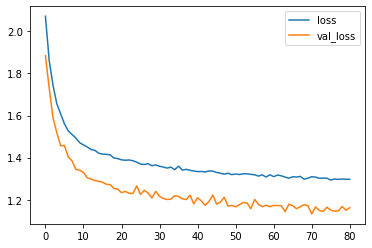

In [ ]:
#Plot losses to see how well model fitted. Check for signs of under / overfitting.
result[['loss','val_loss']].plot()

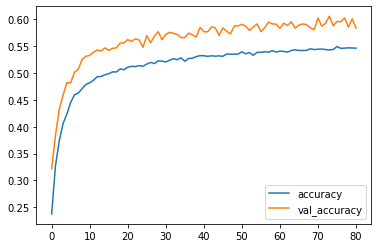

In [ ]:
#Plot of accuracy vs validation accuracy
result[['accuracy','val_accuracy']].plot()

#Model Evaluation and Prediction

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
#Get the metrics from the model. The metrics are the same as the last epoch.
metrics = model.evaluate_generator(test_img_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
#Use the model to predict the test data.
predictions = np.argmax(model.predict(test_img_gen),axis=-1)
predictions

array([6, 2, 1, ..., 4, 6, 1])

In [ ]:
#See the actual 'answers' for the inputs to compare with the predicted results later.
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
#See the statistics after comparing the 'real' results and the predictions
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       980
           1       0.66      0.96      0.78      1135
           2       0.65      0.46      0.54      1032
           3       0.69      0.48      0.57      1010
           4       0.55      0.61      0.58       982
           5       0.53      0.61      0.57       892
           6       0.48      0.58      0.53       958
           7       0.60      0.43      0.50      1028
           8       0.62      0.66      0.64       974
           9       0.45      0.25      0.33      1009

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.58     10000
weighted avg       0.59      0.59      0.58     10000



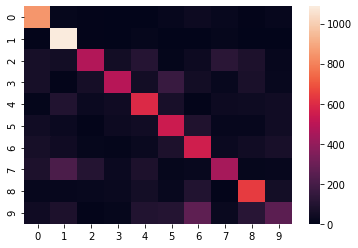

In [ ]:
#Another view of the results in terms of the absolute numbers, correctly or wrongly predicted.
sns.heatmap(confusion_matrix(y_test,predictions))

2


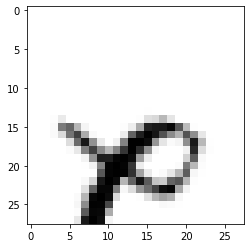

In [ ]:
#Predict randomly chosen and distorted image
index = 990
#Reshape training data to include axis of 1 for greyscale images in order to use image generator.
sample_image = x_test[index].reshape(28,28,1)
print(y_test[index])
distorted_image = image_gen.random_transform(sample_image)
distorted_image = distorted_image.reshape(28,28)
plt.imshow(distorted_image, cmap='Greys')

In [ ]:
#Predict the response though strictly speaking, we should have used totally new data. 
scaled_distorted = distorted_image/255
scaled_distorted = scaled_distorted.reshape(1,28,28,1)
np.argmax(model.predict(scaled_distorted),axis=-1)

array([4])

# Results

Accuracy ==> 59% of the total predictions were predicted correctly.

Highest Precision ==> For the following 3 numbers have the highest precision. The percentage indicates the proportion of the prediction (True + False Positives) that were actually correct (True Positives).

- Number 3 - 69%
- Number 0 - 67%
- Number 1 - 66%

Highest Recall ==> For the following 3 numbers have the highest recall. The percentage indicates the proportion of the correct data (True Positives + False Negatives) is actually predicted correctly (True Positives).

- Number 1 - 96%
- Number 0 - 87%
- Number 8 - 66%

Confused Prediction by Numbers ==> Below shows some numbers that are mistaken for the others as indicated by the lighter colors in the heatmap (outside the diagonal squares).
- Number 1 and 7
- Number 6 and 9
- Number 3 and 5

# Analysis

* Model had a comparatively low accuracy of 59% (vs 98%) when matched against the Standard Number Model. 
* The recall rates for number 1 and 0 were high. It was likely due to the fact that the general shape did not change much given any transformation of the image. 
* Same reason might also had attributed to the high precision rate of number 1 and 0. 
* The confusion showed by the heatmap on the confusion matrix for numbers 1 and 7, 6 and 9 and 3 and 5 could be explained by the similarities between them when they were rotated. 
*In the last prediction, the model predicted the image of 2 to be a number 4. This was a good example which shows how transformation combination could make a number look like another. To a human eye, the image looked more like a flipped 4 than the actual 2 given some trimmed off parts of the image. 
* In summary, although a Standard Number Model provides a good training resource, fitting a model to real-life documents with inherent noise might not be as straightforward.